In [23]:
import pandas as pd
data = pd.read_excel('NOx_Process.xlsx')
day = []
for i in range(336):
    day.append(i)
data['Day'] = day
data.head()

,Unnamed: 0,NOx,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,Day
0,0,10.434783,19.0,47.125,1.87500,-0.9397,-0.342020,1011.76,0.00,0
1,1,14.041667,20.7,45.000,2.62500,0.7660,-0.642788,1012.04,0.10,1
2,2,12.541667,19.9,54.375,5.42857,0.4999,-0.866025,1007.88,0.61,2
3,3,9.958333,16.6,91.250,2.87500,0.9397,-0.342020,1008.66,22.00,3
4,4,12.916667,18.9,70.125,1.87500,-0.5000,0.866025,1007.70,1.00,4


In [24]:
X = data[['Tempreture','Humid','Wind Speed','Wind Direction Sin','Wind Direction COS','Pressure','RainFall','Day']]
X = X.values
Y = data['NOx']
Y = Y.values
from sklearn.preprocessing import StandardScaler
sc_X3 = StandardScaler()
sc_y3 = StandardScaler()
X3_3 = sc_X3.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0 ,test_size=0.2)


# MLP

In [25]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(25, activation='relu', input_dim=8))
model.add(Dense(25,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=2000,batch_size=len(x_train), verbose=0)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 102.0753


102.07526397705078

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_new_inverse3 = model.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse3)
mae33 = mean_absolute_error(y_test, y_new_inverse3)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 62.492
rmse : 7.905
mae : 5.770


(0, 90)

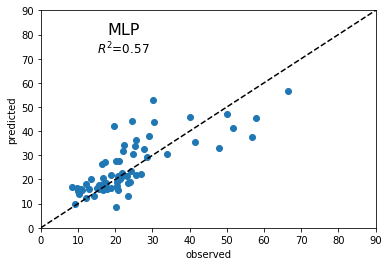

In [76]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse3)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(18,80,'MLP',fontsize=16)
plt.text(15,72, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse3)),fontsize=12)
plt.xlim([0, 90])
plt.ylim([0, 90])

In [65]:
model_json1 = model.to_json()
with open("MLP_NOx_without_Autocorelation_3.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("MLP_NOx_without_Autocorelation_3.h5")
print("Saved model to disk")

Saved model to disk


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
regressor10 = RandomForestRegressor(n_estimators=64, random_state=0)
regressor10.fit(x_train, y_train)
y_new_inverse30 = regressor10.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse30)
mae33 = mean_absolute_error(y_test, y_new_inverse30)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 71.937
rmse : 8.482
mae : 5.877


(0, 90)

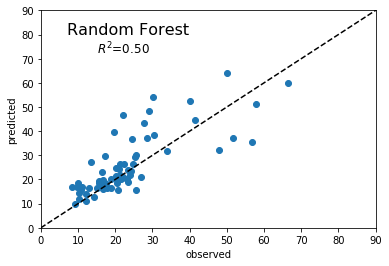

In [28]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse30)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(7,80,'Random Forest',fontsize=16)
plt.text(15,72, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse30)),fontsize=12)
plt.xlim([0, 90])
plt.ylim([0, 90])

# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
sklinreg = LinearRegression()
sklinreg.fit(x_train, y_train)
y_ord_pred = sklinreg.predict(x_test)
mse33 = mean_squared_error(y_test, y_ord_pred)
mae33 = mean_absolute_error(y_test, y_ord_pred)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 109.439
rmse : 10.461
mae : 7.778


(0, 90)

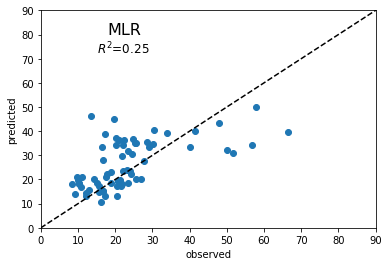

In [82]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_ord_pred)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(18,80,'MLR',fontsize=16)
plt.text(15,72, r'$R^2$=%.2f'% (
       r2_score(y_test,y_ord_pred)),fontsize=12)
plt.xlim([0, 90])
plt.ylim([0, 90])